<a href="https://colab.research.google.com/github/elixir-biohackathon-project-12/network-analysis/blob/main/age_differences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt 

In [2]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%dT%H:%M:%SZ")
    d2 = datetime.strptime(d2, "%Y-%m-%dT%H:%M:%SZ")
    return abs((d2 - d1).days)

In [3]:
import io
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving collectors_info.csv to collectors_info.csv
Saving selected.csv to selected.csv


In [20]:
nodes = pd.read_csv(io.BytesIO(uploaded['collectors_info.csv']), header=None, names = ['wdid', 'namestr', 'gender', 'CC', 'BD', 'DD'])
edges = pd.read_csv(io.BytesIO(uploaded['selected.csv']))

nodes.head()

,wdid,namestr,gender,CC,BD,DD
0,http://www.wikidata.org/entity/Q100156193,Laurence Henry Millener,male,New Zealand,1914-04-01T00:00:00Z,2000-01-01T00:00:00Z
1,http://www.wikidata.org/entity/Q100156193,Laurence Henry Millener,male,New Zealand,1914-04-01T00:00:00Z,2000-01-01T00:00:00Z
2,http://www.wikidata.org/entity/Q100157099,Ross Henry Michie,male,New Zealand,1894-01-01T00:00:00Z,1987-01-01T00:00:00Z
3,http://www.wikidata.org/entity/Q100587885,Myrtle L. T. Adams,female,United States of America,1903-12-13T00:00:00Z,1989-02-16T00:00:00Z
4,http://www.wikidata.org/entity/Q100600540,Hubert Walter Simmonds,unknown,unknown,1877-01-01T00:00:00Z,1966-03-16T00:00:00Z


## calculate ages

In [21]:
nodes.BD = nodes.BD.replace('S.D.', '4000-01-01T00:00:00Z')
nodes.DD = nodes.DD.replace('S.D.', '4000-01-01T00:00:00Z')

In [22]:
nodes.BD

0       1914-04-01T00:00:00Z
1       1914-04-01T00:00:00Z
2       1894-01-01T00:00:00Z
3       1903-12-13T00:00:00Z
4       1877-01-01T00:00:00Z
                ...         
3005    4000-01-01T00:00:00Z
3006    4000-01-01T00:00:00Z
3007    4000-01-01T00:00:00Z
3008    4000-01-01T00:00:00Z
3009    4000-01-01T00:00:00Z
Name: BD, Length: 3010, dtype: object

In [23]:
ages = []
for index,row in nodes.iterrows():
  try:
    ages.append(days_between(row['DD'], row['BD']))
  except ValueError:
    ages.append(np.NaN)

nodes['age'] = ages

In [24]:
nodes.head()

,wdid,namestr,gender,CC,BD,DD,age
0,http://www.wikidata.org/entity/Q100156193,Laurence Henry Millener,male,New Zealand,1914-04-01T00:00:00Z,2000-01-01T00:00:00Z,31321.0
1,http://www.wikidata.org/entity/Q100156193,Laurence Henry Millener,male,New Zealand,1914-04-01T00:00:00Z,2000-01-01T00:00:00Z,31321.0
2,http://www.wikidata.org/entity/Q100157099,Ross Henry Michie,male,New Zealand,1894-01-01T00:00:00Z,1987-01-01T00:00:00Z,33967.0
3,http://www.wikidata.org/entity/Q100587885,Myrtle L. T. Adams,female,United States of America,1903-12-13T00:00:00Z,1989-02-16T00:00:00Z,31112.0
4,http://www.wikidata.org/entity/Q100600540,Hubert Walter Simmonds,unknown,unknown,1877-01-01T00:00:00Z,1966-03-16T00:00:00Z,32580.0


## calculate age differences

In [25]:
gender_1 = []
gender_2 = []
agediff = []

print(len(edges))
edges_unique = pd.DataFrame.drop_duplicates(edges)
print(edges_unique.head())


for index, row in edges_unique.iterrows():
  gender_1.append(nodes.loc[nodes.wdid == row['person1']]['gender'])
  gender_2.append(nodes.loc[nodes.wdid == row['person2']]['gender'])
  try:
    age1 = nodes.loc[nodes.wdid == row['person1']]['BD']
    age1 = age1.values[0]
    age2 = nodes.loc[nodes.wdid == row['person2']]['BD']
    age2 = age2.values[0]
    agediff.append(abs(days_between(age2,age1))/365)
  except IndexError:
    pass

print(len(agediff))

1184652
                                    person1                                   person2
0     https://orcid.org/0000-0002-7053-8557     https://orcid.org/0000-0002-7991-6593
1     https://orcid.org/0000-0002-7053-8557     https://orcid.org/0000-0003-1790-4332
280   https://orcid.org/0000-0002-7053-8557     https://orcid.org/0000-0002-1768-2891
2293  https://orcid.org/0000-0002-7053-8557  http://www.wikidata.org/entity/Q26714160
2759  https://orcid.org/0000-0003-3580-6808     https://orcid.org/0000-0002-3093-1258
8660


(array([1914., 1446., 1170.,  972.,  668.,  514.,  330.,  206.,  106.,
          64.,   72.,   44.,   20.,   22.,   26.,   34.,   20.,   10.,
          14.,   20.,    8.,   16.,    6.,   10.,    4.,   14.,    4.,
          10.,    6.,    6.,    2.,    2.,    0.,    2.,    0.,    0.,
           0.,    0.,    0.,    2.]),
 array([5.47945205e-03, 5.41664384e+00, 1.08278082e+01, 1.62389726e+01,
        2.16501370e+01, 2.70613014e+01, 3.24724658e+01, 3.78836301e+01,
        4.32947945e+01, 4.87059589e+01, 5.41171233e+01, 5.95282877e+01,
        6.49394521e+01, 7.03506164e+01, 7.57617808e+01, 8.11729452e+01,
        8.65841096e+01, 9.19952740e+01, 9.74064384e+01, 1.02817603e+02,
        1.08228767e+02, 1.13639932e+02, 1.19051096e+02, 1.24462260e+02,
        1.29873425e+02, 1.35284589e+02, 1.40695753e+02, 1.46106918e+02,
        1.51518082e+02, 1.56929247e+02, 1.62340411e+02, 1.67751575e+02,
        1.73162740e+02, 1.78573904e+02, 1.83985068e+02, 1.89396233e+02,
        1.94807397e+02, 2.0021

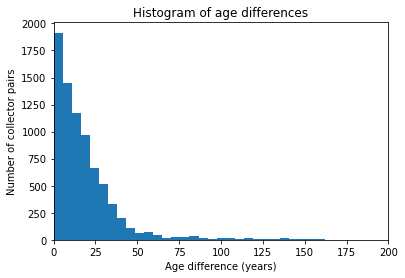

In [27]:
agediff = [i for i in agediff if i != 0]
agediff = [i for i in agediff if i < 1000]

agediff
plt.xlabel('Age difference (years)')
plt.ylabel('Number of collector pairs')
plt.xlim(0, 200)
plt.title('Histogram of age differences')
plt.hist(agediff, bins=40)